<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Открыть-файл" data-toc-modified-id="Открыть-файл-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открыть файл</a></span></li><li><span><a href="#Изучить" data-toc-modified-id="Изучить-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изучить</a></span></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Подготовка</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Исследуем-баланс-классов" data-toc-modified-id="Исследуем-баланс-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследуем баланс классов</a></span></li><li><span><a href="#Обучим-модель-без-учёта-дисбаланса" data-toc-modified-id="Обучим-модель-без-учёта-дисбаланса-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучим модель без учёта дисбаланса</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Весовой-баланс" data-toc-modified-id="Весовой-баланс-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Весовой баланс</a></span></li><li><span><a href="#Увеличение-выборки-через-upsampling" data-toc-modified-id="Увеличение-выборки-через-upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки через upsampling</a></span></li><li><span><a href="#Уменьшение-выборки-через-downsampling" data-toc-modified-id="Уменьшение-выборки-через-downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки через downsampling</a></span></li><li><span><a href="#Подбор-порога" data-toc-modified-id="Подбор-порога-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Подбор порога</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Финальные-комментарии-ревьюера" data-toc-modified-id="Финальные-комментарии-ревьюера-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Финальные комментарии ревьюера</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Нужно посторить модель с предельно большим значением *F1*-меры, доведя метрику до 0.59.

Дополнительно измерить *AUC-ROC*, сравнивать её значение с *F1*-мерой.

**Описание данных.
Признаки:**

- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

**Целевой признак:**
- Exited — факт ухода клиента

## Подготовка данных

### Открыть файл

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder


pd.options.display.max_rows = 999
pd.options.mode.chained_assignment = None

import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    data = pd.read_csv('/datasets/Churn.csv', sep=',')
except:
    data = pd.read_csv('Churn.csv', sep=',')

### Изучить

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


array([[<AxesSubplot:title={'center':'RowNumber'}>,
        <AxesSubplot:title={'center':'CustomerId'}>,
        <AxesSubplot:title={'center':'CreditScore'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>],
       [<AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>, <AxesSubplot:>]],
      dtype=object)

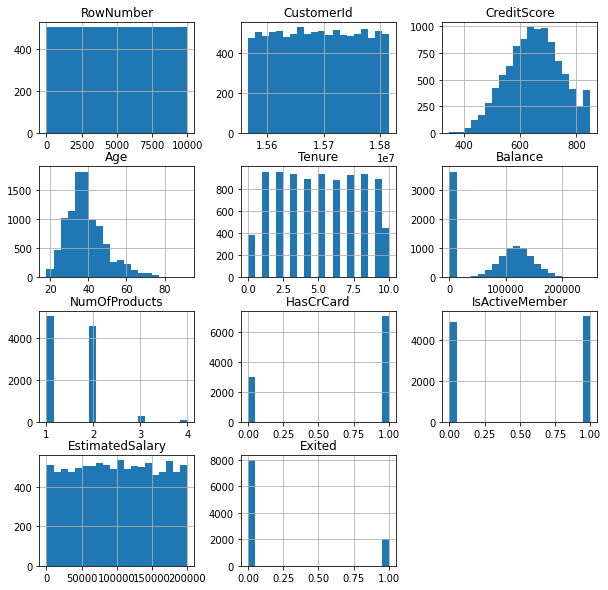

In [5]:
data.hist(figsize=(10,10), bins=20)

In [6]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# явные дубликаты
data.duplicated().sum()

0

В данных есть пропуски, названия не по феншую. Типы правильные, аномалий не замечено. Явных дубликатов нет.

### Подготовка

In [9]:
# индексы и уникальные идентификаторы удалим, они не дадут никаких зависимостей
data = data.drop(['RowNumber', 'CustomerId'], axis=1)

In [10]:
# фамилии тоже не дадут нам информации
data = data.drop('Surname', axis=1)

In [11]:
# оформим названия
data = data.rename(columns={'CreditScore':'Credit_Score',
                            'NumOfProducts':'Num_Of_Products',
                            'HasCrCard':'Has_Cr_Card',
                            'IsActiveMember':'Is_Active_Member',
                            'EstimatedSalary':'Estimated_Salary'
                           })

data.columns = data.columns.str.lower()

In [12]:
data.columns

Index(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_cr_card', 'is_active_member',
       'estimated_salary', 'exited'],
      dtype='object')

In [13]:
# пропуски в tenure заполним медианой
data['tenure'] = data['tenure'].fillna(data['tenure'].median())

In [14]:
# кодируем категориальные признаки
data = pd.get_dummies(data, drop_first=True)

In [15]:
data.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'num_of_products',
       'has_cr_card', 'is_active_member', 'estimated_salary', 'exited',
       'geography_Germany', 'geography_Spain', 'gender_Male'],
      dtype='object')

In [16]:
# готовим выборки

target = data['exited']
features = data.drop('exited', axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.40, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.50, random_state=12345)

In [17]:
# проверим размеры выборок
print([f.shape[0]/features.shape[0] for f in [features_train, features_valid, features_test]])

[0.6, 0.2, 0.2]


In [18]:
# масштабируем численные параметры

numeric = ['tenure', 'num_of_products','credit_score', 'age', 'balance', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

## Исследование задачи

### Исследуем баланс классов

In [19]:
target_valid.value_counts(normalize=1)

0    0.791
1    0.209
Name: exited, dtype: float64

<AxesSubplot:>

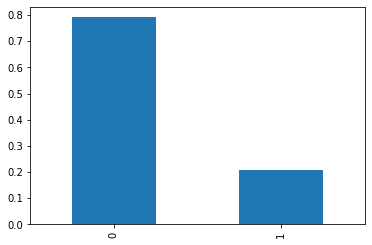

In [20]:
target_valid.value_counts(normalize=1).plot.bar()

Есть дисбаланс классов, их соотношение 4 к 1, что далеко от 1:1. Это плохо сказывается на обучении модели. 

### Обучим модель без учёта дисбаланса

In [21]:
# логистическая модель
def logistic_model(features_train, target_train,
                   features_valid, target_valid, balance=None):
    if balance:
        balance = 'balanced'
    model = LogisticRegression(random_state=12345, solver='lbfgs', class_weight=balance)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    score = f1_score(target_valid, predicted_valid)
    probabilities_one_valid = model.predict_proba(features_valid)[:, 1]
    
    print(f'Логистическая f1: {score:0.2}')
    print(f'recall: {recall_score(target_valid, predicted_valid):0.3}')
    print(f'precision: {precision_score(target_valid, predicted_valid):0.3}')
    print(f'AUC:{roc_auc_score(target_valid, probabilities_one_valid):0.3}')
    
    return model, score

In [22]:
# дерево
def find_best_tree(features_train, target_train,
                     features_valid, target_valid,
                     depth_list, balance=None):
    if balance:
        balance = 'balanced'
    best_f1_score = 0
    best_depth = depth_list[0]
    for depth in depth_list:
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight=balance)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        score = f1_score(target_valid, predicted_valid)
        if best_f1_score < score:
            best_model_predict = predicted_valid
            best_model = model
            best_f1_score = score
            best_depth = depth
            
    probabilities_one_valid = best_model.predict_proba(features_valid)[:, 1]
    
    print(f'Лучший f1 дерева: {best_f1_score:0.4}, глубина: {best_depth}')
    print(f'recall: {recall_score(target_valid, best_model_predict):0.3}')
    print(f'precision: {precision_score(target_valid, best_model_predict):0.3}')
    print(f'AUC:{roc_auc_score(target_valid, probabilities_one_valid):0.3}')
    
    return best_model, best_f1_score, best_depth

In [23]:
# лес
def find_best_forest(features_train, target_train,
                     features_valid, target_valid,
                     depth_list, est_list, balance=None):
    if balance:
        balance = 'balanced'
    best_f1_score = 0
    best_depth = depth_list[0]
    best_est = est_list[0]
    for est in est_list:
        for depth in depth_list:
            model = RandomForestClassifier(random_state=12345, max_depth=depth,
                                           n_estimators=est, class_weight=balance)
            model.fit(features_train, target_train)
            predicted_valid = model.predict(features_valid)
            score = f1_score(target_valid, predicted_valid)
            if best_f1_score < score:
                best_model = model
                best_f1_score = score
                best_depth = depth
                best_est = est
    
    best_predict = best_model.predict(features_valid)
    probabilities_one_valid = best_model.predict_proba(features_valid)[:, 1]
    
    print(f'Лучший f1: {best_f1_score:0.4}, глубина: {best_depth}, деревьев: {best_est}')
    print(f'recall: {recall_score(target_valid, best_predict):0.3}')
    print(f'precision: {precision_score(target_valid, best_predict):0.3}')
    print(f'AUC:{roc_auc_score(target_valid, probabilities_one_valid):0.3}')
    
    return best_model, best_f1_score, best_depth, best_est, probabilities_one_valid

In [24]:
model, score = logistic_model(
    features_train, target_train, features_valid, target_valid)

Логистическая f1: 0.33
recall: 0.234
precision: 0.563
AUC:0.759


In [25]:
model, score, depth = find_best_tree(
    features_train, target_train,
    features_valid, target_valid, depth_list=range(1, 11))

Лучший f1 дерева: 0.5697, глубина: 6
recall: 0.45
precision: 0.777
AUC:0.816


In [26]:
%%time
model, score, depth, est, proba_one = find_best_forest(
    features_train, target_train,
    features_valid, target_valid, depth_list=range(1, 11), est_list=range(10,50,10))

Лучший f1: 0.5891, глубина: 10, деревьев: 10
recall: 0.467
precision: 0.799
AUC:0.846
CPU times: user 4.47 s, sys: 12 ms, total: 4.49 s
Wall time: 4.5 s


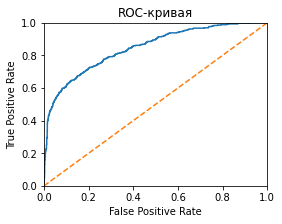

In [27]:
# функция для графика ROC
def draw_roc(target, probability_one):
    fpr, tpr, thresholds = roc_curve(target, probability_one)
    
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()

# график ROC для леса
draw_roc(target_valid, proba_one)

## Борьба с дисбалансом

Попробуем разные способы и сравним их. Выберем лучшую модель, и подберем пороги.

### Весовой баланс

In [28]:
# логистическая
model, score = logistic_model(
    features_train, target_train, features_valid, target_valid, balance=True)

Логистическая f1: 0.49
recall: 0.682
precision: 0.381
AUC:0.764


In [29]:
# дерево
model, score, depth = find_best_tree(
    features_train, target_train,
    features_valid, target_valid, depth_list=range(1, 11), balance=True)

Лучший f1 дерева: 0.5964, глубина: 5
recall: 0.67
precision: 0.537
AUC:0.831


In [30]:
%%time
# лес
model, score, depth, est, proba_one = find_best_forest(
    features_train, target_train,
    features_valid, target_valid, depth_list=range(1, 11), est_list=range(10, 50, 10), balance=True)

Лучший f1: 0.6237, глубина: 8, деревьев: 40
recall: 0.694
precision: 0.566
AUC:0.855
CPU times: user 4.48 s, sys: 5.75 ms, total: 4.49 s
Wall time: 4.49 s


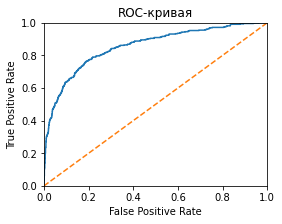

In [31]:
# график ROC для леса
draw_roc(target_valid, proba_one)

У всех моделей результат сильно лучше, чем без баланса совсем. Вырос F1 и полнота. Но у всех упала точность, они с полнотой противоположны по своей природе. AUC не изменился, хотя у леса график кривой изменился.

### Увеличение выборки через upsampling

In [32]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled,
                                                  target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4)

In [33]:
# логистическая
model, score = logistic_model(
    features_train_upsampled, target_train_upsampled, features_valid, target_valid)

Логистическая f1: 0.49
recall: 0.682
precision: 0.381
AUC:0.764


In [34]:
# дерево
model, score, depth = find_best_tree(
    features_train_upsampled, target_train_upsampled,
    features_valid, target_valid, depth_list=range(1, 11))

Лучший f1 дерева: 0.5964, глубина: 5
recall: 0.67
precision: 0.537
AUC:0.831


In [35]:
%%time
# лес
model, score, depth, est, proba_one = find_best_forest(
    features_train_upsampled, target_train_upsampled,
    features_valid, target_valid, depth_list=range(1, 11), est_list=range(10, 50, 10))

Лучший f1: 0.624, глубина: 8, деревьев: 30
recall: 0.722
precision: 0.549
AUC:0.853
CPU times: user 5.86 s, sys: 13.1 ms, total: 5.87 s
Wall time: 5.94 s


И эти результаты лучше, чем с несбалансированными классами.

По сравнению со сбалансированным весом - увеличение выборки дало точно такие же результаты для логистической модели и дерева, только у леса выше полнота и ниже точность, при том же F1.

### Уменьшение выборки через downsampling

In [36]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, 0.25)

In [37]:
# логистическая
model, score = logistic_model(
    features_train_downsampled, target_train_downsampled, features_valid, target_valid)

Логистическая f1: 0.48
recall: 0.672
precision: 0.378
AUC:0.762


In [38]:
# дерево
model, score, depth = find_best_tree(
    features_train_downsampled, target_train_downsampled,
    features_valid, target_valid, depth_list=range(1, 11))

Лучший f1 дерева: 0.5943, глубина: 5
recall: 0.701
precision: 0.516
AUC:0.824


In [39]:
%%time
# лес
model, score, depth, est, proba_one = find_best_forest(
    features_train_downsampled, target_train_downsampled,
    features_valid, target_valid, depth_list=range(1, 11), est_list=range(10,100,10))

Лучший f1: 0.6092, глубина: 4, деревьев: 10
recall: 0.727
precision: 0.524
AUC:0.835
CPU times: user 11.4 s, sys: 63.4 ms, total: 11.4 s
Wall time: 13.2 s


- Логистическая модель почти не изменилась по сравнению с увеличенной выборкой.
- У дерева немного выросла полнота, но уменьшилась точность и немного F1 и AUC.
- У леса полнота почти такая же, но уменьшилась точность, F1 и AUC.

### Подбор порога

Выберем модель.

Лучше всего показал себя сбалансированный лес с F1 = 0.6237, глубиной 8, числом деревьев 40.

In [40]:
model = RandomForestClassifier(random_state=12345, max_depth=8,
                               n_estimators=40, class_weight='balanced')
model.fit(features_train, target_train)
probabilities_one_valid = model.predict_proba(features_valid)[:, 1]

In [41]:
for threshold in np.arange(0, 1, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    f1 = f1_score(target_valid, predicted_valid)
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    print(f"Порог = {threshold:.2f} | F1 = {f1:.3f} Точность = {precision:.3f}, Полнота = {recall:.3f}")

Порог = 0.00 | F1 = 0.346 Точность = 0.209, Полнота = 1.000
Порог = 0.05 | F1 = 0.346 Точность = 0.209, Полнота = 1.000
Порог = 0.10 | F1 = 0.368 Точность = 0.226, Полнота = 0.995
Порог = 0.15 | F1 = 0.402 Точность = 0.254, Полнота = 0.971
Порог = 0.20 | F1 = 0.432 Точность = 0.280, Полнота = 0.945
Порог = 0.25 | F1 = 0.463 Точность = 0.310, Полнота = 0.916
Порог = 0.30 | F1 = 0.505 Точность = 0.353, Полнота = 0.888
Порог = 0.35 | F1 = 0.547 Точность = 0.402, Полнота = 0.856
Порог = 0.40 | F1 = 0.580 Точность = 0.456, Полнота = 0.799
Порог = 0.45 | F1 = 0.616 Точность = 0.520, Полнота = 0.756
Порог = 0.50 | F1 = 0.624 Точность = 0.566, Полнота = 0.694
Порог = 0.55 | F1 = 0.630 Точность = 0.639, Полнота = 0.622
Порог = 0.60 | F1 = 0.612 Точность = 0.685, Полнота = 0.553
Порог = 0.65 | F1 = 0.588 Точность = 0.739, Полнота = 0.488
Порог = 0.70 | F1 = 0.542 Точность = 0.768, Полнота = 0.419
Порог = 0.75 | F1 = 0.497 Точность = 0.823, Полнота = 0.356
Порог = 0.80 | F1 = 0.439 Точность = 0.8

Получается, порог должен быть 0.55, и тогда F1 будет 0.63

## Тестирование модели

In [42]:
# Берем модель сбалансированного леса, получаем оценку теста, и применяем порог
probabilities_one_test = model.predict_proba(features_test)[:, 1]

f1_score(target_test, probabilities_one_test > 0.55)

0.6004842615012106

In [43]:
# получим оценку теста без применения порога
probabilities_one_test = model.predict_proba(features_test)[:, 1]

f1_score(target_test, probabilities_one_test > 0.5)

0.5976008724100327

In [44]:
# обучим на объедененных данных
features_full_train = pd.concat([features_train, features_valid])
target_full_train = pd.concat([target_train, target_valid])

model = RandomForestClassifier(random_state=12345, max_depth=8,
                               n_estimators=40, class_weight='balanced')
model.fit(features_full_train, target_full_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=40,
                       random_state=12345)

In [45]:
# получаем оценку теста без применения порога
probabilities_one_test = model.predict_proba(features_test)[:, 1]

f1_score(target_test, probabilities_one_test > 0.5)

0.6221743810548978

## Выводы

Данные разделены на выборки. В них оказался дисбаланс 4:1. В процессе подбора способа борьбы с дисбалансом увеличение полноты сопровождалось уменьшением точности. Балансировка по весу получила тот же результат, что и увеличение выборки, а уменьшенная выборка оказалась хуже по большинству показателей всех моделей.

AUC самый низкий у логистической модели, выше у дерева решений, еще выше случайный лес.
Также AUC выше после балансировки классов, кроме уменьшенной выборки.

Выбран случайный лес с весовым балансом, и для него перебраны пороги, выбран порог 0.55

Получилось добиться F1 = 0.63 на валидационной выборке.

Тест модели дает F1 = 0.59, а со сдвигом порога удалось достичь F1 = 0.6

Но можно добиться и большего, если совместить валидационную и тренировочную выборки.
Обученная на этих объединенных данных модель достигает на тестовой выборке F1 = 0.62